# Bigrams to Transformers: 


outlines different **approaches to learn** language modeling concepts

Minimal vocabulary, fast to train. Good for seeing if the model learns character patterns.

- Bigrams → MLPs → CNNs → Transformers

1. **Count-Based Bigram Model**  
   Uses frequency statistics of character pairs (bigrams) to estimate the probability of the next character.

2. **Neural Bigram Model**  
   A simple neural network that predicts the next character based on a single-character input.

3. **MLP with Extended Context**  
   A multi-layer perceptron model that takes multiple preceding characters as input to provide richer context.

4. **CNN-Inspired Hierarchical Model**  
   processes sequences hierarchically, capturing local dependencies across layers.

5. **Simple Transformer Model**  
   A self-attention based architecture that processes the entire sequence simultaneously 
   capture long-range dependencies and relationships between all characters in the context window.


###  Optimizer ( SGD , Adam ..)

- Optimizers adjust model weights to minimize the loss function using gradients.
- **SGD** uses raw gradients scaled by a fixed learning rate — simple but may be unstable.
- **Adam** adds momentum and adaptive learning rates for faster, smoother convergence.


###  Dropout in Neural Networks


**Dropout** At each training step, a random fraction of neurons are **"dropped" (set to zero)**, meaning they do not participate in the forward or backward pass.  

Why Use Dropout?

Without dropout:
- becoming overly dependent on specific neurons or features.
- Neural networks can **overfit** training data by memorizing it.

With dropout:
- Each neuron can't rely on others always being present.
- The model learns **redundant and robust representations**.
- It acts like training **many smaller sub-networks simultaneously** (ensemble effect).


**At inference time, dropout is disabled - All neurons are active**

Example: Redundant Representations

Imagine a model trying to detect a **cat** from features:

- has an ear
- has a tail
- is furry
- has claws
- mischievous look



With dropout:
- Random neurons/features are **dropped temporarily** (`❌`).
- The network must still detect "cat" by combining the remaining features.


- [ has an ear ❌ ]
- [ has a tail ✔️ ]
- [ is furry ❌ ]
- [ has claws ✔️ ]
- [ mischievous look ❌ ]

Prediction → cat score ✅

Forces the network to have a redundant representation"

Each mini-model (subset of the full network) learns to predict "cat" with different combinations.


- neuron_42 → only activates if "is furry" 
- training with dropout
    - neuron_42 → activates if "is furry"
    - neuron_57 → also activates if "is furry" OR "has a tail"
    - neuron_13 → activates for "mischievous look"





###  Regularization: Motivation Example

Consider the following:

- Input vector:  
  $$
  x = [1, 1, 1, 1]
  $$

- Two possible weight vectors that yield the same prediction:

  $$
  w_1 = [1, 0, 0, 0] \\
  w_2 = [0.25, 0.25, 0.25, 0.25]
  $$

- Both produce the same output when applied to `x`:

  $$
  w_1^T x = 1 \\
  w_2^T x = 1
  $$

So, **which one should we prefer**?



### L2 Regularization Insight

L2 regularization encourages **smaller, more evenly distributed** weights.

Let’s compare their L2 norms:
- $\|w_1\|_2^2 = 1^2 + 0^2 + 0^2 + 0^2 = 1$
- $\|w_2\|_2^2 = 4 \times (0.25)^2 = 0.25$

✅ Thus, **$w_2$ has a smaller L2 norm** → L2 regularization prefers $w_2$.



### 📐 L1 vs L2 Regularization

| Term | Formula | Effect |
|------|---------|--------|
| Regularization | Formula | Effect |
|----------------|---------|--------|
| **L1 (Lasso)** | $\lambda \sum \|w_i\|$ | Encourages sparsity (many zero weights) |
| **L2 (Ridge)** | $\lambda \sum w_i^2$   | Encourages small, distributed weights |

- **L1** → sparse models, feature selection.
- **L2** → smooth solutions, avoids large individual weights.


### Summary

Even though both $w_1$ and $w_2$ give the same prediction, **L2 regularization** would favor $w_2$ for its **lower weight magnitude**, promoting **generalization** and **numerical stability**.



In [14]:
! pip install matplotlib
! pip install numpy
! pip install torch==2.2.2+cu121 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

print(torch.__version__)             
print(torch.version.cuda)            
print(torch.cuda.is_available())     


Looking in indexes: https://download.pytorch.org/whl/cu121
2.2.2+cu121
12.1
True


##  **Tensor Slicing: `words[:n1]`**
**Purpose:** Slicing tensor

```

In [15]:
words_examples = torch.tensor([15, 13, 9, 14, 1, 8, 1, 13, 21, 5, 1, 3])

print(words_examples[:9])    # [0:9] → first 9 elements
print(words_examples[9:10])    # [9:10] → element at index 9
print(words_examples[10:])     # [10:] → remaining elements

tensor([15, 13,  9, 14,  1,  8,  1, 13, 21])
tensor([5])
tensor([1, 3])


## **`tensor.view()` - Tensor Reshaping**
**Purpose:** Reshape tensors without changing data 

In [16]:

example_x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: [2, 3]
print(f"Original: {example_x.shape} \n{example_x}")

# Reshape to different dimensions
print(f"Reshape to different dimensions:")
print(example_x.view(6))        # Flatten to 1D: [6]
print(example_x.view(6, 1))      # Column vector: [6, 1] 
print(example_x.view(1, 6))      # Row vector: [1, 6]
print(example_x.view(2, -1))      # Row vector: [2, 3] auto-calculate

Original: torch.Size([2, 3]) 
tensor([[1, 2, 3],
        [4, 5, 6]])
Reshape to different dimensions:
tensor([1, 2, 3, 4, 5, 6])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])
tensor([[1, 2, 3, 4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


## **`torch.multinomial()` - Probability Sampling**
**Purpose:** Sample from probability distributions


In [17]:
# Create probability distribution for next character prediction
example_probs = torch.tensor([0.1, 0.3, 0.4, 0.2])  # 4 possible characters
print(f"Probabilities: {example_probs}")

# Sample one character based on probabilities
g = torch.Generator().manual_seed(42)
sampled_idx = torch.multinomial(example_probs, num_samples=1, replacement=True, generator=g).item()
print(f"Sampled character index: {sampled_idx}")

# Sample multiple characters
samples = torch.multinomial(example_probs, num_samples=5, replacement=True, generator=g)
print(f"Multiple samples: {samples}")

Probabilities: tensor([0.1000, 0.3000, 0.4000, 0.2000])
Sampled character index: 1
Multiple samples: tensor([1, 2, 3, 1, 0])


## **`F.one_hot()` - One-Hot Encoding**

In [18]:
import torch.nn.functional as F

# Character indices (e.g., a=0, b=1, c=2, ...)
char_indices = torch.tensor([0, 1, 2, 0])  # represents "abca"
vocab_size = 3  # we have 3 characters: a, b, c

# Convert to one-hot encoding
one_hot = F.one_hot(char_indices, num_classes=vocab_size).float()
print(f"Indices: {char_indices}")
print(f"One-hot encoding:\n{one_hot}")
print(f"Shape: {one_hot.shape}")  # [4, 3] → 4 characters, 3 vocab size

Indices: tensor([0, 1, 2, 0])
One-hot encoding:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])
Shape: torch.Size([4, 3])


## **`BatchNorm1d` - Batch Normalization**
**Purpose:** Normalize layer inputs to stabilize training and improve convergence

In [19]:
batch_size, hidden_size = 32, 128
hidden_activations = torch.randn(batch_size, hidden_size)
print(f"Input shape: {hidden_activations.shape}")
print(f"Before BatchNorm - Mean: {hidden_activations.mean():.3f}, Std: {hidden_activations.std():.3f}")

# Apply batch normalization
batch_norm = torch.nn.BatchNorm1d(hidden_size)
normalized = batch_norm(hidden_activations)

print(f"After BatchNorm - Mean: {normalized.mean():.3f}, Std: {normalized.std():.3f}")
print(f"Output shape: {normalized.shape}")

Input shape: torch.Size([32, 128])
Before BatchNorm - Mean: -0.001, Std: 0.996
After BatchNorm - Mean: -0.000, Std: 1.000
Output shape: torch.Size([32, 128])


###   Training a Neural Network (Main Loop)

```python
while True:
    # 1. Get a batch of training data
    data_batch = sample_data_batch()

    # 2. Forward pass: compute predictions and loss
    loss = forward(data_batch)

    # 3. Backward pass: compute gradients of loss w.r.t parameters
    gradients = backward()

    # 4. Update parameters using gradient descent
    x -= learning_rate * gradients


### **Step-by-Step Training Process**

#### **Step 1: Data Preparation** Select training batch


#### **Step 2: Forward Pass** Model prediction
```python
# Model prediction
logits = model(x_batch)
loss = compute_loss(logits, y_batch)
```

#### **Step 3: Backward Pass** Gradient computation and parameter update
```python
# Gradient computation and parameter update
optimizer.zero_grad()
loss.backward()
optimizer.step()
```

#### **Step 4: Training Loop**
```python
for epoch in range(num_epochs):
    for batch in train_loader:
        # Repeat Steps 1-3
        train_step(model, batch, optimizer)
```

#### **Step 5: Validation & Test Evaluation**
```python
# Calculate losses without gradient updates
val_loss = evaluate(model, val_data)
test_loss = evaluate(model, test_data)
```

#### **Step 6: Text Generation**
```python
# Generate sample text to assess model quality
sample_text = generate(model, prompt="The", length=50)
```




---

In [20]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

### Data Preparation

First, let's load the dataset and prepare the character vocabulary that all four models will use.
### Load the names dataset


In [21]:
# Load the names dataset
words = open('names.txt', 'r').read().splitlines()
random.shuffle(words)
print(f"📚 Dataset loaded: {len(words)} names")
print(f"   Sample names: {words[:10]}")
print(f"   Name lengths: min={min(len(w) for w in words)}, max={max(len(w) for w in words)}")

📚 Dataset loaded: 46539 names
   Sample names: ['rajkumar', 'viya', 'dael', 'spirit', 'ishika', 'naszir', 'neeshu', 'reygan', 'sohan', 'emmalouise']
   Name lengths: min=1, max=19


### Create character vocabulary / tokens 

In [22]:
# Create character vocabulary
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}  # string to index
stoi['.'] = 0  # special start/end token
itos = {i:s for s,i in stoi.items()}  # index to string
vocab_size = len(itos)

print(f"\n📝 Vocabulary created:")
print(f"   Size: {vocab_size} characters")
print(f"   Characters: {''.join(chars)}")
print(f"   Start/End token '.': index {stoi['.']}")


📝 Vocabulary created:
   Size: 27 characters
   Characters: abcdefghijklmnopqrstuvwxyz
   Start/End token '.': index 0


### Dataset splits : Training , Validation & Test
- Data are sampled without replacement during training (80% , 10% , 10% )

In [23]:


n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

train_words = words[:n1]
val_words = words[n1:n2] 
test_words = words[n2:]

print(f"\n📊 Dataset splits:")
print(f"   Training: {len(train_words)} names")
print(f"   Validation: {len(val_words)} names") 
print(f"   Test: {len(test_words)} names")



📊 Dataset splits:
   Training: 37231 names
   Validation: 4654 names
   Test: 4654 names


# Model 1: Count-based Bigram Model

- The count-based approach counts frequency of character pairs and converts them to probabilities. This is the traditional statistical approach.


#### Build bigram count matrix from training data

In [24]:
# Build bigram count matrix from training data
N = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

print("📊 Building bigram counts...")
for w in train_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

print(f"✅ Count matrix built: {N.shape}")
print(f"   Total bigrams: {N.sum().item()}")



📊 Building bigram counts...
✅ Count matrix built: torch.Size([27, 27])
   Total bigrams: 261746


### Visualize the count matrix before conversion to probabilities


📊 Visualizing bigram count matrix with actual counts...


RuntimeError: Numpy is not available

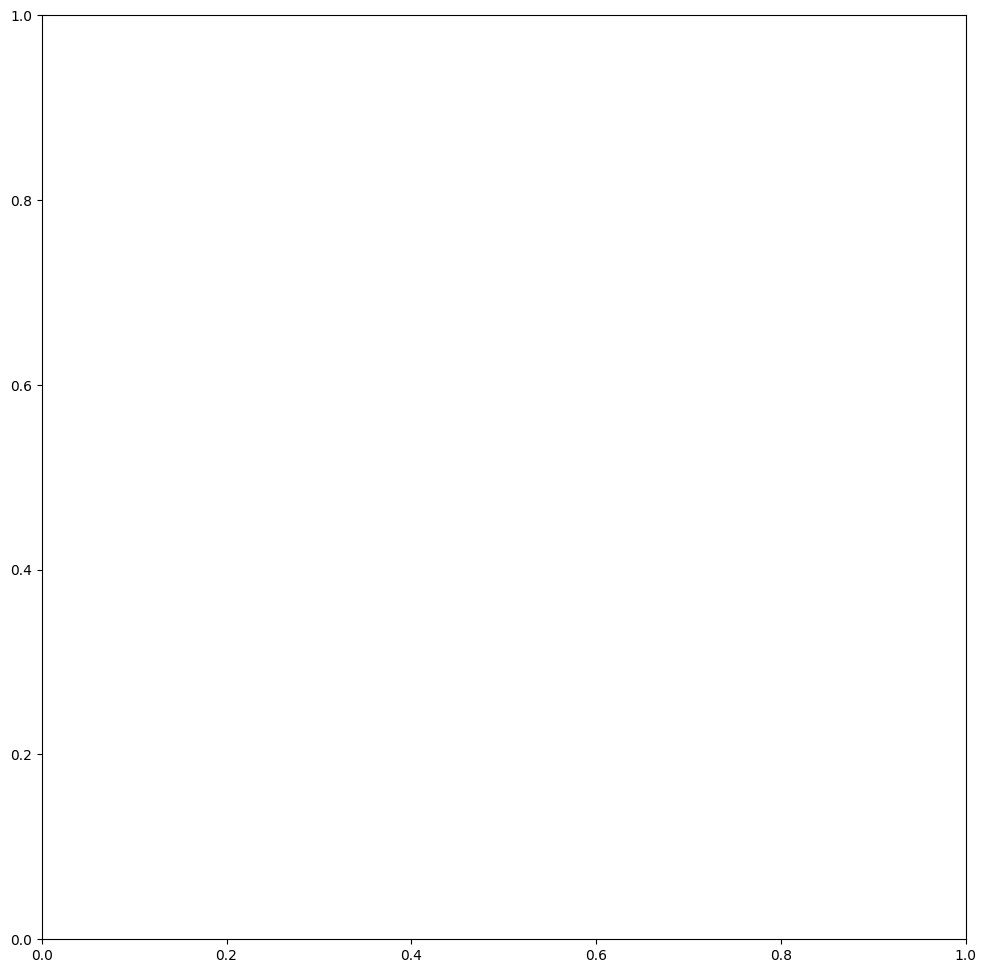

In [25]:

# Visualize the count matrix before conversion to probabilities
print(f"\n📊 Visualizing bigram count matrix with actual counts...")
plt.figure(figsize=(15, 12))

# Display the count matrix in green
im = plt.imshow(N, cmap='Greens', interpolation='nearest')
plt.colorbar(im, label='Count')
plt.title('Bigram Count Matrix (Raw Counts with Values)', fontsize=16, fontweight='bold')
plt.xlabel('Next Character', fontsize=12)
plt.ylabel('Current Character', fontsize=12)

# Add character labels on axes
plt.xticks(range(len(itos)), [itos[i] for i in range(len(itos))], rotation=90)
plt.yticks(range(len(itos)), [itos[i] for i in range(len(itos))])

# Add count numbers directly on each cell
for i in range(len(itos)):
    for j in range(len(itos)):
        count = N[i, j].item()
        if count > 0:  # Only show non-zero counts to avoid clutter
            # Choose text color based on background intensity
            text_color = 'white' if count > N.max().item() * 0.6 else 'black'
            plt.text(j, i, str(count), ha='center', va='center', 
                    fontsize=8, color=text_color, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3, color='white', linewidth=0.5)

# Show some statistics on the plot
total_counts = N.sum().item()
max_count = N.max().item()
plt.figtext(0.02, 0.02, f'Total bigrams: {total_counts:,}\nMax count: {max_count}\nShowing actual count values', 
           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"📈 Count Matrix Statistics:")
print(f"   • Total bigrams: {total_counts:,}")
print(f"   • Maximum count: {max_count} (most frequent bigram)")
print(f"   • Matrix size: {N.shape[0]}×{N.shape[1]} ({vocab_size} characters)")


#### Convert to probabilities with smoothing

In [26]:
# Convert to probabilities with smoothing
# add-1 smoothing is a technique used to avoid zero probabilities in probability distributions.
# discourages the model from becoming overly confident where the count is zero

#broadcasting
# P1.sum(1, keepdims=True) is a broadcasting operation that sums the rows of the matrix P1.
# The keepdims=True argument ensures that the result is a 2D array with the same shape as P1.

# P1 / P1.sum(1, keepdims=True) is a broadcasting operation that divides the matrix P1 by the sum of each row.
# The result is a 2D array with the same shape as P1, but with the division of each row by the sum of that row.

print(f"\n🎯 Converting to probabilities with add-1 smoothing...")
P1 = (N + 1).float()                                    # discourages the model from becoming overly confident where the count is zero
P1 = P1 / P1.sum(1, keepdims=True)

print(f"✅ Probability matrix P1: {P1.shape}")
print(f"   Each row sums to 1.0: {P1.sum(1)[:3]}")


🎯 Converting to probabilities with add-1 smoothing...
✅ Probability matrix P1: torch.Size([27, 27])
   Each row sums to 1.0: tensor([1., 1., 1.])


#### Calculate loss (Negative Log-Likelihood)

In [27]:
# Calculate loss (Negative Log-Likelihood)
def evaluate_count_model(words_list, P, stoi, model_name):
    log_likelihood = 0.0
    n = 0
    
    for w in words_list:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = P[ix1, ix2]
            log_likelihood += torch.log(prob)
            n += 1
    
    nll = -log_likelihood
    avg_nll = nll / n   #average negative log-likelihood
    return avg_nll.item()

# Evaluate on different sets
train_loss_1 = evaluate_count_model(train_words, P1, stoi, "Count-based")
val_loss_1 = evaluate_count_model(val_words, P1, stoi, "Count-based")

print(f"\n📉 Model 1 Results:")
print(f"   Training Loss: {train_loss_1:.4f}")
print(f"   Validation Loss: {val_loss_1:.4f}")



📉 Model 1 Results:
   Training Loss: 2.4705
   Validation Loss: 2.4600


### Generate names (Sampling from Probabilities)

In [28]:


# Generate names
def generate_count_based(P, itos, stoi, num_samples=10, seed=42):
    g = torch.Generator().manual_seed(seed)
    names = []
    
    for i in range(num_samples):
        out = []
        ix = 0  # start with '.'
        
        while True:
            p = P[ix]
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
            if ix == 0:  # stop at end token
                break
            out.append(itos[ix])
        
        names.append(''.join(out))
    
    return names

names_1 = generate_count_based(P1, itos, stoi, num_samples=15, seed=42)
print(f"\n✨ Model 1 Generated Names:")
for i, name in enumerate(names_1, 1):
    print(f"   {i:2d}. {name}")




✨ Model 1 Generated Names:
    1. ya
    2. syahavilin
    3. dleekasm
    4. minnya
    5. tryawe
    6. chen
    7. ena
    8. da
    9. amiiae
   10. a
   11. keles
   12. ld
   13. a
   14. oy
   15. ashuki


### Model 1 Summary

In [29]:
print(f"\n📊 Model 1 Summary:")
print(f"   • Approach: Frequency counts + smoothing")
print(f"   • Parameters: {vocab_size}×{vocab_size} probability matrix")
print(f"   • Training: None required (just counting)")
print(f"   • Training Loss: {train_loss_1:.4f}")
print(f"   • Validation Loss: {val_loss_1:.4f}")


📊 Model 1 Summary:
   • Approach: Frequency counts + smoothing
   • Parameters: 27×27 probability matrix
   • Training: None required (just counting)
   • Training Loss: 2.4705
   • Validation Loss: 2.4600


# Model 2: Neural Bigram Model
-  learns a weight matrix through gradient descent to predict the next character. It should converge to similar statistics as the count-based model.


### Create training dataset

- `hello`

- `. → h`
- `h → e`
- `e → l`
- `l → l`
- `l → o`
- `o → .`
 

In [ ]:
# Create training dataset
def create_bigram_dataset(words_list, stoi):
    xs, ys = [], []
    for w in words_list:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            xs.append(ix1)
            ys.append(ix2)
    return torch.tensor(xs), torch.tensor(ys)


# Create datasets
Xtr, Ytr = create_bigram_dataset(train_words, stoi)
Xte, Yte = create_bigram_dataset(test_words, stoi)
Xval, Yval = create_bigram_dataset(val_words, stoi)


print("🔍 Sample input vs true label mappings (index → character):")
for i in range(5): 
    ix_input = Xtr[i].item()
    ix_target = Ytr[i].item()
    ch_input = itos[ix_input]
    ch_target = itos[ix_target]
    print(f" {ix_input} ({ch_input}) → {ix_target} ({ch_target})")


print(f"📊 Neural bigram dataset:")
print(f"   Training: {Xtr.shape[0]} examples")
print(f"   Test: {Xte.shape[0]} examples")
print(f"   Validation: {Xval.shape[0]} examples")



🔍 Sample input vs true label mappings (index → character):
 0 (.) → 18 (r)
 18 (r) → 1 (a)
 1 (a) → 10 (j)
 10 (j) → 11 (k)
 11 (k) → 21 (u)
📊 Neural bigram dataset:
   Training: 261746 examples
   Test: 32628 examples
   Validation: 32704 examples


### Initialize neural network

In [ ]:
# Initialize neural network
g = torch.Generator().manual_seed(2147483647)


xenc = F.one_hot(Xtr, num_classes=vocab_size).float()                       # one-hot encoding of the input
W2 = torch.randn((vocab_size, vocab_size), generator=g, requires_grad=True) # random initialization of the weights learnable params

print(f"\n⚙️ Neural network initialized:")
print(f"   Weight matrix W2: {W2.shape}    Parameters: {W2.nelement()}")
print(f"   xenc: {xenc.shape}")


⚙️ Neural network initialized:
   Weight matrix W2: torch.Size([27, 27])    Parameters: 729
   xenc: torch.Size([261746, 27])


### Training loop

In [ ]:
# Training loop
print(f"\n🚀 Training neural bigram model...")
losses_2 = []
num_epochs = 2000
learning_rate = 50

for epoch in range(num_epochs):
    # Forward pass
    
    # Process ALL 261746 examples at once 
    logits = xenc @ W2     # logits is the output of the neural network
    
    # Convert to probabilities using softmax (via exp + normalize)
    counts = logits.exp()   # element-wise exponential
    probs = counts / counts.sum(1, keepdims=True) # row-wise normalization to get probabilities
    
    # Training loss
    loss = -probs[torch.arange(Xtr.nelement()), Ytr].log().mean() # Negative log-likelihood ,  cross-entropy loss
    loss += 0.01 * (W2**2).mean()  # L2 regularization
    losses_2.append(loss.item())
    
    # Backward pass
    W2.grad = None
    loss.backward()
    W2.data += -learning_rate * W2.grad
    
    if epoch % 500 == 0 or epoch == num_epochs - 1:
        print(f"   Epoch {epoch:3d}/{num_epochs}: Train Loss = {loss.item():.4f}")





print(f"\n✅ Training completed successfully!")
print(f"   📈 Total epochs: {num_epochs}")
print(f"   📉 Final training loss: {losses_2[-1]:.4f}")
print(f"   ⏳ Now calculating validation loss on trained model...")


# Plot training curve (training progress only)
plt.figure(figsize=(10, 6))
plt.plot(losses_2, label='Training Loss', alpha=0.8, linewidth=2, color='coral')
plt.title('Model 2: Neural Bigram Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🚀 Training neural bigram model...
   Epoch   0/2000: Train Loss = 3.7561


KeyboardInterrupt: 

### Final evaluation - Calculate loss on test & validation data

In [ ]:
# Final evaluation - Calculate validation loss on fully trained model
print(f"\n🎯 Evaluating trained model on validation data...")
with torch.no_grad():
    # Training set evaluation
    xenc = F.one_hot(Xte, num_classes=vocab_size).float()
    logits = xenc @ W2
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    test_loss_2 = -probs[torch.arange(Xte.nelement()), Yte].log().mean().item()
    
    # Validation set evaluation (calculated AFTER training completion)
    xenc_val = F.one_hot(Xval, num_classes=vocab_size).float()
    logits_val = xenc_val @ W2
    counts_val = logits_val.exp()
    probs_val = counts_val / counts_val.sum(1, keepdims=True)
    val_loss_2 = -probs_val[torch.arange(Xval.nelement()), Yval].log().mean().item()

print(f"\n📉 Model 2 Final Results (After Training):")
print(f"   Test Loss: {test_loss_2:.4f}")
print(f"   Validation Loss: {val_loss_2:.4f}")




🎯 Evaluating trained model on validation data...

📉 Model 2 Final Results (After Training):
   Test Loss: 2.4714
   Validation Loss: 2.4648


### Generate names 

In [ ]:

# Generate names
def generate_neural_bigram(W, itos, stoi, vocab_size, num_samples=10, seed=42):
    g = torch.Generator().manual_seed(seed)
    names = []
    
    for i in range(num_samples):
        out = []
        ix = 0  # start with '.'
        
        while True:
            xenc = F.one_hot(torch.tensor([ix]), num_classes=vocab_size).float()
            logits = xenc @ W
            counts = logits.exp()
            p = counts / counts.sum(1, keepdims=True)
            
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the distribution
            if ix == 0:
                break
            out.append(itos[ix])
        
        names.append(''.join(out))
    
    return names

names_2 = generate_neural_bigram(W2, itos, stoi, vocab_size, num_samples=15, seed=42)
print(f"\n Model 2 Generated Names:")
for i, name in enumerate(names_2, 1):
    print(f"   {i:2d}. {name}")





 Model 2 Generated Names:
    1. anugurovi
    2. s
    3. mabidushan
    4. shan
    5. silaylelakemah
    6. li
    7. an
    8. epiachaden
    9. diza
   10. k
   11. pon
   12. jondre
   13. kan
   14. k
   15. miqulynabh


### Model 2 Summary

In [ ]:
print(f"\n📊 Model 2 Summary:")
print(f"   • Approach: Neural network with gradient descent")
print(f"   • Parameters: {W2.nelement()} learnable weights")
print(f"   • Training: {num_epochs} epochs")
print(f"   • Validation: Calculated post-training (clean assessment)")
print(f"   • Final Loss: {val_loss_2:.4f}")
print(f"   • 🎯 Converged to similar performance as count-based model")


📊 Model 2 Summary:
   • Approach: Neural network with gradient descent
   • Parameters: 729 learnable weights
   • Training: 2000 epochs
   • Validation: Calculated post-training (clean assessment)
   • Final Loss: 2.4648
   • 🎯 Converged to similar performance as count-based model


### Alternative Implementation: Embedding Table + Adam Optimizer + CrossEntropyLoss

- Alternative Approach: PyTorch Embedding Table - Converges Faster Due To:

- 1. Adam Optimizer (adaptive learning rates + momentum) vs Manual SGD  
- 2. CrossEntropyLoss (numerically stable) vs Manual negative log-likelihood
- 3. No L2 regularization (Adam has implicit regularization) 
- 4. Efficient nn.Embedding lookup vs one-hot encoding + matrix multiply
- 5. PyTorch autograd optimization vs manual gradient updates

#### BigramEmbeddingModel

In [ ]:
class BigramEmbeddingModel(torch.nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        # Embedding table of shape [vocab_size, vocab_size]
        # Each character maps directly to a vocab_size dimensional vector (logits)
        self.token_embedding_table = torch.nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx):
        # idx shape: (batch_size,) or (batch_size, seq_len)
        logits = self.token_embedding_table(idx)  # shape: [batch_size, vocab_size]
        return logits

# Initialize model
model_emb = BigramEmbeddingModel(vocab_size)


print(f"   Embedding table: {list(model_emb.token_embedding_table.weight.shape)} ({vocab_size} chars -> {vocab_size} logits)")
print(f"   Total parameters: {sum(p.numel() for p in model_emb.parameters())}")


   Embedding table: [27, 27] (27 chars -> 27 logits)
   Total parameters: 729


### Training setup

In [ ]:

# Training setup
optimizer = torch.optim.Adam(model_emb.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

print(f"\n🚀 Training PyTorch embedding model...")
losses_2_emb = []
num_epochs_emb = 100  # Fewer epochs with Adam optimizer


for epoch in range(num_epochs_emb):
    # Forward pass
    logits = model_emb(Xtr)  # shape: [N, vocab_size]
    loss = loss_fn(logits, Ytr)  # Cross-entropy loss
    losses_2_emb.append(loss.item())
    
    # Backward pass
    optimizer.zero_grad() # clear gradients
    loss.backward() # compute gradients
    optimizer.step() # update weights
    
    if epoch % 10 == 0 or epoch == num_epochs_emb - 1:
        print(f"   Epoch {epoch:3d}/{num_epochs_emb}: Train Loss = {loss.item():.4f}")

print(f"\n✅ PyTorch embedding training completed!")






🚀 Training PyTorch embedding model...
   Epoch   0/100: Train Loss = 3.7165
   Epoch  10/100: Train Loss = 2.8779
   Epoch  20/100: Train Loss = 2.5859
   Epoch  30/100: Train Loss = 2.5018
   Epoch  40/100: Train Loss = 2.4869
   Epoch  50/100: Train Loss = 2.4789
   Epoch  60/100: Train Loss = 2.4756
   Epoch  70/100: Train Loss = 2.4739
   Epoch  80/100: Train Loss = 2.4730
   Epoch  90/100: Train Loss = 2.4725
   Epoch  99/100: Train Loss = 2.4721

✅ PyTorch embedding training completed!


### Evaluate embedding setup

In [ ]:
# Evaluate embedding model
print(f"\n🎯 Evaluating PyTorch embedding model...")
model_emb.eval()
with torch.no_grad():
    # Training evaluation
    logits_te = model_emb(Xte)
    test_loss_2_emb = F.cross_entropy(logits_te, Yte).item()
    
    # Validation evaluation
    logits_val = model_emb(Xval)
    val_loss_2_emb = F.cross_entropy(logits_val, Yval).item()

print(f"\n📉 PyTorch Embedding Model Results:")
print(f"   Test Loss: {test_loss_2_emb:.4f}")
print(f"   Validation Loss: {val_loss_2_emb:.4f}")


🎯 Evaluating PyTorch embedding model...

📉 PyTorch Embedding Model Results:
   Test Loss: 2.4674
   Validation Loss: 2.4617


# Model 3: MLP with Extended Context (Moving beyond single characters)

- Context window : Uses previous characters to predict the next (vs 1 character in bigrams)
- A count-based approach would need 27³ = 19,683 parameters (one for each trigram)


### Create MLP dataset with extended context (3)

- `'...'` → `'r'`
- `'..r'` → `'a'`
- `'.ra'` → `'j'`
- `'raj'` → `'k'`
- `'ajk'` → `'u'`

In [ ]:

# Set context length (number of characters to look back)
block_size = 3  # Use 3 previous characters to predict next
print(f"📐 Context window: {block_size} characters")

# Create MLP dataset with extended context
def create_mlp_dataset(words_list, stoi, block_size):
    X, Y = [], []
    for w in words_list:
        context = [0] * block_size  # Initialize with start tokens
        for ch in w + '.':  # Add each character + end token
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]  # Slide the window
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

# Create datasets
X3_tr, Y3_tr = create_mlp_dataset(train_words, stoi, block_size)
X3_val, Y3_val = create_mlp_dataset(val_words, stoi, block_size)
X3_test, Y3_test = create_mlp_dataset(test_words, stoi, block_size)

print(f"📊 MLP dataset:")
print(f"   Training: {X3_tr.shape} -> {Y3_tr.shape}")
print(f"   Validation: {X3_val.shape} -> {Y3_val.shape}")
print(f"   Test: {X3_test.shape} -> {Y3_test.shape}")

# Show some examples
print(f"\n🔍 First 5 training examples:")
for i in range(5):
    context_chars = ''.join([itos[ix] for ix in X3_tr[i].tolist()])
    target_char = itos[Y3_tr[i].item()]
    print(f"   '{context_chars}' -> '{target_char}'")

📐 Context window: 3 characters
📊 MLP dataset:
   Training: torch.Size([261746, 3]) -> torch.Size([261746])
   Validation: torch.Size([32704, 3]) -> torch.Size([32704])
   Test: torch.Size([32628, 3]) -> torch.Size([32628])

🔍 First 5 training examples:
   '...' -> 'r'
   '..r' -> 'a'
   '.ra' -> 'j'
   'raj' -> 'k'
   'ajk' -> 'u'


####  Create model (Embedding → Linear → Tanh → Linear)

In [ ]:
class MLPModel(torch.nn.Module):
    def __init__(self, vocab_size, block_size, emb_dim=10, hidden_size=200):
        super().__init__()
        self.block_size = block_size
        self.emb_dim = emb_dim
        
        
        self.embedding = torch.nn.Embedding(vocab_size, emb_dim)
        self.linear1 = torch.nn.Linear(block_size * emb_dim, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, vocab_size)
        self.activation = torch.nn.Tanh()
                
    def forward(self, x):
        #(Embedding → Linear → Tanh → Linear)
        # x shape: (batch_size, block_size)
        emb = self.embedding(x)  # (batch_size, block_size, emb_dim)
        emb_flat = emb.view(emb.shape[0], -1)  # (batch_size, block_size * emb_dim)
        hidden = self.activation(self.linear1(emb_flat))  # (batch_size, hidden_size)
        logits = self.linear2(hidden)  # (batch_size, vocab_size)
        return logits

# Initialize model
torch.manual_seed(2147483647)  # Same seed as manual approach
model_mlp = MLPModel(vocab_size, block_size, emb_dim=10, hidden_size=200)

# Count parameters
total_params = sum(p.numel() for p in model_mlp.parameters())
print(f"\n MLP Architecture:")
print(f"   Embedding: {vocab_size} chars -> 10D vectors")
print(f"   Input: {block_size} chars -> {block_size * 10}D concatenated")
print(f"   Hidden: {block_size * 10} -> 200 (tanh)")
print(f"   Output: 200 -> {vocab_size} (logits)")
print(f"   Total parameters: {total_params}")


 MLP Architecture:
   Embedding: 27 chars -> 10D vectors
   Input: 3 chars -> 30D concatenated
   Hidden: 30 -> 200 (tanh)
   Output: 200 -> 27 (logits)
   Total parameters: 11897


#### Training setup

   Iter       0/200,000: Train Loss = 3.3236, LR = 0.001000
   Iter  20,000/200,000: Train Loss = 2.2877, LR = 0.001000
   Iter  40,000/200,000: Train Loss = 1.9043, LR = 0.001000
   Iter  60,000/200,000: Train Loss = 1.9373, LR = 0.001000
   Iter  80,000/200,000: Train Loss = 2.6199, LR = 0.001000
   Iter 100,000/200,000: Train Loss = 1.9322, LR = 0.001000
   Iter 120,000/200,000: Train Loss = 2.3731, LR = 0.001000
   Iter 140,000/200,000: Train Loss = 1.9839, LR = 0.001000
   Iter 160,000/200,000: Train Loss = 2.2153, LR = 0.001000
   Iter 180,000/200,000: Train Loss = 1.9590, LR = 0.001000
   Iter 199,999/200,000: Train Loss = 1.6628, LR = 0.001000

✅  training completed successfully!
   📉 Final training loss: 1.6628


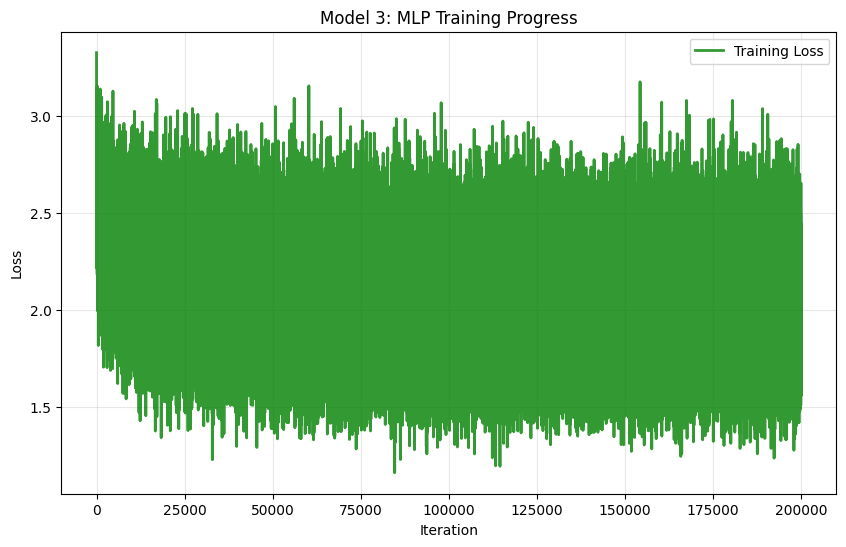

In [ ]:


# Training setup
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()


stepi = []
lossi = []
num_iterations = 200000  
batch_size = 32 # minibatch size


for i in range(num_iterations):
    # Minibatch construct 
    ix = torch.randint(0, X3_tr.shape[0], (batch_size,))  # 1D tensor , 32 random training indices
    
    # Forward pass
    logits = model_mlp(X3_tr[ix])
    loss = loss_fn(logits, Y3_tr[ix])
    
    # Track stats for monitoring training progress
    stepi.append(i)
    lossi.append(loss.item())
    
    # Backward pass
    optimizer.zero_grad()   # clear gradients
    loss.backward()         # compute gradients
    optimizer.step()        # update weights
    
    # Print progress every 20,000 iterations  
    if i % 20000 == 0 or i == num_iterations - 1:
        current_lr = optimizer.param_groups[0]['lr']  # Access Adam's learning rate
        print(f"   Iter {i:7,}/{num_iterations:,}: Train Loss = {loss.item():.4f}, LR = {current_lr:.6f}")

print(f"\n✅  training completed successfully!")
print(f"   📉 Final training loss: {lossi[-1]:.4f}")



# Plot exactly like bigram model
plt.figure(figsize=(10, 6))
plt.plot(lossi, label='Training Loss', alpha=0.8, linewidth=2, color='green')
plt.title('Model 3: MLP Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()





### Final evaluation - Calculate validation loss on fully trained model

In [ ]:

# Final evaluation - Calculate validation loss on fully trained model
print(f"\n🎯 Evaluating trained PyTorch model on validation data...")

model_mlp.eval()  # Set to evaluation mode
with torch.no_grad():
    # Training loss (sample to avoid memory issues)
    test_ix = torch.randint(0, X3_tr.shape[0], (min(5000, X3_tr.shape[0]),))
    logits_tr = model_mlp(X3_tr[test_ix])
    test_loss_3_mlp = loss_fn(logits_tr, Y3_tr[test_ix]).item()
    
    # Validation loss (calculated AFTER training completion)
    val_ix = torch.randint(0, X3_val.shape[0], (min(2000, X3_val.shape[0]),))
    logits_val = model_mlp(X3_val[val_ix])
    val_loss_3_mlp = loss_fn(logits_val, Y3_val[val_ix]).item()


print(f"   Test Loss: {test_loss_3_mlp:.4f}")
print(f"   Validation Loss: {val_loss_3_mlp:.4f}")




🎯 Evaluating trained PyTorch model on validation data...
   Test Loss: 2.0394
   Validation Loss: 2.1121


### Generate names

In [ ]:
# Generate names 
def generate_pytorch_mlp(model, itos, stoi, block_size, num_samples=10, seed=42):
    model.eval()
    torch.manual_seed(seed)  # Same seed as manual
    names = []
    
    for i in range(num_samples):
        out = []
        context = [0] * block_size  # Initialize with start tokens
        
        while True:
            with torch.no_grad():
                # PyTorch forward pass
                x = torch.tensor([context])
                logits = model(x)  # (1, vocab_size)
                probs = F.softmax(logits, dim=1)
                
                ix = torch.multinomial(probs, num_samples=1).item()
                context = context[1:] + [ix]  # Update context window
                
                if ix == 0:  # End token
                    break
                out.append(itos[ix])
        
        names.append(''.join(out))
    
    return names

names_3_pytorch = generate_pytorch_mlp(model_mlp, itos, stoi, block_size, num_samples=15, seed=42)
print(f"\n MLP Generated Names:")
for i, name in enumerate(names_3_pytorch, 1):
    print(f"   {i:2d}. {name}")




 MLP Generated Names:
    1. anuelly
    2. tis
    3. marian
    4. dantu
    5. samilla
    6. mello
    7. mahel
    8. man
    9. epince
   10. deelanis
   11. kender
   12. keyra
   13. kalla
   14. mohd
   15. yamar


### MLP Summary

In [ ]:
print(f"\n📊 MLP Summary: (Embedding → Linear → Tanh → Linear)")
print(f"   • Parameters: {total_params} learnable weights")
print(f"   • Validation Loss: {val_loss_3_mlp:.4f}")



📊 MLP Summary: (Embedding → Linear → Tanh → Linear)
   • Parameters: 11897 learnable weights
   • Validation Loss: 2.1121


### Final results comparison (count , bigram , MLP)


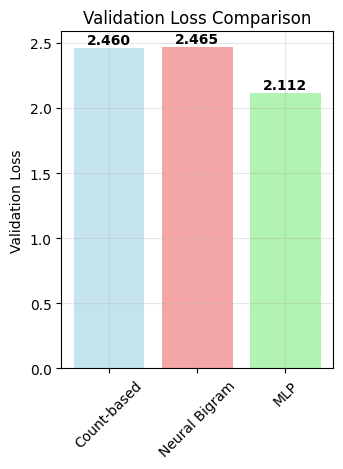

In [ ]:
# Final results comparison
plt.subplot(1, 2, 2)
models = ['Count-based', 'Neural Bigram', 'MLP']
losses = [val_loss_1, val_loss_2, val_loss_3_mlp] 
colors = ['lightblue', 'lightcoral', 'lightgreen']
bars = plt.bar(models, losses, color=colors, alpha=0.7)
plt.title('Validation Loss Comparison')
plt.ylabel('Validation Loss')
plt.xticks(rotation=45)
for bar, loss in zip(bars, losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{loss:.3f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model 4: CNN-Inspired Hierarchical Model
- The CNN-inspired model uses a hierarchical approach with longer context. 
- It processes characters in a tree-like structure with multiple levels of abstraction.

### Create CNN dataset with longer context
`'........' → 'r'`<br>
`'.......r' → 'a'`<br>
`'......ra' → 'j'`<br>
`'.....raj' → 'k'`<br>
`'....rajk' → 'u'`

In [ ]:
# Extended context length for hierarchical processing

block_size_cnn = 8  # Longer context than MLP
print(f"📐 Context window: {block_size_cnn} characters (extended)")

# Create CNN dataset with longer context
def create_cnn_dataset(words_list, stoi, block_size):
    X, Y = [], []
    for w in words_list:
        context = [0] * block_size  # Initialize with start tokens
        for ch in w + '.':  # Add each character + end token
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]  # Slide the window
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

# Create datasets
X4_tr, Y4_tr = create_cnn_dataset(train_words, stoi, block_size_cnn)
X4_val, Y4_val = create_cnn_dataset(val_words, stoi, block_size_cnn)
X4_test, Y4_test = create_cnn_dataset(test_words, stoi, block_size_cnn)

print(f"📊 CNN dataset:")
print(f"   Training: {X4_tr.shape} -> {Y4_tr.shape}")
print(f"   Validation: {X4_val.shape} -> {Y4_val.shape}")
print(f"   Test: {X4_test.shape} -> {Y4_test.shape}")

# Show some examples
print(f"\n🔍 First 5 training examples:")
for i in range(5):
    context_chars = ''.join([itos[ix] for ix in X4_tr[i].tolist()])
    target_char = itos[Y4_tr[i].item()]
    print(f"   '{context_chars}' -> '{target_char}'")

📐 Context window: 8 characters (extended)
📊 CNN dataset:
   Training: torch.Size([261746, 8]) -> torch.Size([261746])
   Validation: torch.Size([32704, 8]) -> torch.Size([32704])
   Test: torch.Size([32628, 8]) -> torch.Size([32628])

🔍 First 5 training examples:
   '........' -> 'r'
   '.......r' -> 'a'
   '......ra' -> 'j'
   '.....raj' -> 'k'
   '....rajk' -> 'u'


### Hierarchical CNN Processing Logic

#### Level-by-Level Processing

### LEVEL 1: Character Pairs (8 chars → 4 pairs)
- **Input:** Take adjacent character pairs: `[char1,char2]`, `[char3,char4]`, `[char5,char6]`, `[char7,char8]`
- **Concatenation:** Embeddings: `24D + 24D = 48D` per pair
- **Processing:** Linear transformation: `48D → 128D` (learns bigram patterns like "th", "er", "an")
- **Result:** 4 groups of 128D vectors representing character pairs

### LEVEL 2: Pair Grouping (4 pairs → 2 groups)
- **Input:** Combine adjacent pairs: `[pair1,pair2]`, `[pair3,pair4]`
- **Concatenation:** Representations: `128D + 128D = 256D` per group
- **Processing:** Linear transformation: `256D → 128D` (learns 4-character patterns)
- **Result:** 2 groups of 128D vectors representing 4-char sequences

### LEVEL 3: Final Merge (2 groups → 1 representation)
- **Input:** Merge remaining groups: `[group1, group2]`
- **Concatenation:** `128D + 128D = 256D`
- **Processing:** Linear transformation: `256D → 128D` (learns full 8-character context)
- **Result:** Single 128D vector capturing entire sequence pattern

### OUTPUT: Prediction (1 representation → next character)
- **Processing:** Final Linear: `128D → 27D` (vocabulary size)
- **Result:** Probability distribution over all possible next characters



In [ ]:

# CNN-inspired model


class HierarchicalCNN(torch.nn.Module):
    def __init__(self, vocab_size, emb_dim=24, hidden_size=128, block_size=8):
        super().__init__()
        self.block_size = block_size
        self.emb_dim = emb_dim

        # Embedding layer
        self.embedding = torch.nn.Embedding(vocab_size, emb_dim)
        
        # Hierarchical processing layers
        # Level 1: Process pairs of characters (8 -> 4)
        self.level1 = torch.nn.Sequential(
            torch.nn.Linear(emb_dim * 2, hidden_size, bias=False),
            torch.nn.BatchNorm1d(hidden_size),
            torch.nn.Tanh()
        )
        
        # Level 2: Process pairs of level1 outputs (4 -> 2)
        self.level2 = torch.nn.Sequential(
            torch.nn.Linear(hidden_size * 2, hidden_size, bias=False),
            torch.nn.BatchNorm1d(hidden_size),
            torch.nn.Tanh()
        )
        
        # Level 3: Process pairs of level2 outputs (2 -> 1)
        self.level3 = torch.nn.Sequential(
            torch.nn.Linear(hidden_size * 2, hidden_size, bias=False),
            torch.nn.BatchNorm1d(hidden_size),
            torch.nn.Tanh()
        )
        
        # Final output layer
        self.output = torch.nn.Linear(hidden_size, vocab_size)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        # Initialize output layer
        with torch.no_grad():
            self.output.weight *= 0.1
    
    def forward(self, x):
        # x shape: (batch_size, block_size)
        batch_size = x.shape[0]
        
        # Embedding: (batch_size, block_size, emb_dim)
        emb = self.embedding(x)
        

        # Level 1: Group pairs of characters (8 chars -> 4 groups)
        emb_pairs = emb.view(batch_size, 4, self.emb_dim * 2)  # (batch, 4, emb_dim*2)
        level1_out = self.level1(emb_pairs.view(-1, self.emb_dim * 2))  # (batch*4, hidden)
        level1_out = level1_out.view(batch_size, 4, -1)  # (batch, 4, hidden)
        
        # Level 2: Group pairs of level1 outputs (4 -> 2)
        level1_pairs = level1_out.view(batch_size, 2, -1)  # (batch, 2, hidden*2)
        level2_out = self.level2(level1_pairs.view(-1, level1_pairs.shape[-1]))  # (batch*2, hidden)
        level2_out = level2_out.view(batch_size, 2, -1)  # (batch, 2, hidden)
        
        # Level 3: Final pair processing (2 -> 1)
        level2_pairs = level2_out.view(batch_size, -1)  # (batch, hidden*2)
        level3_out = self.level3(level2_pairs)  # (batch, hidden)
        
        # Output
        logits = self.output(level3_out)  # (batch, vocab_size)
        return logits


# Initialize model
torch.manual_seed(42)
model_cnn = HierarchicalCNN(vocab_size, emb_dim=24, hidden_size=128, block_size=block_size_cnn)

# Count parameters
total_params = sum(p.numel() for p in model_cnn.parameters())


print(f"\n⚙️ CNN Architecture:")
print(f"   Embedding: {vocab_size} chars -> 24D vectors")
print(f"   Output: Hidden(128) -> {vocab_size} logits")
print(f"   Total parameters: {total_params:,}")



⚙️ CNN Architecture:
   Embedding: 27 chars -> 24D vectors
   Output: Hidden(128) -> 27 logits
   Total parameters: 76,579


### Training setup

In [ ]:
# Training setup
print(f"\n🚀 Training CNN model ...")
model_cnn.train()

optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

num_iterations = 200000
batch_size = 32
cnn_losses = []

print(f"   🎯 Training: {num_iterations:,} iterations")
print(f"   📊 Progress updates every 20,000 iterations")



for i in range(num_iterations):
    # Minibatch
    ix = torch.randint(0, X4_tr.shape[0], (batch_size,))
    Xb, Yb = X4_tr[ix], Y4_tr[ix]
    
    # Forward pass
    logits = model_cnn(Xb)
    loss = F.cross_entropy(logits, Yb)
    cnn_losses.append(loss.item())
    
    # Backward pass
    optimizer.zero_grad()   #clear the gradients
    loss.backward()         #compute the gradients
    optimizer.step()        #update the weights
    
    
    # Progress
    if i % 20000 == 0 or i == num_iterations - 1:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"   Iter {i:7,}/{num_iterations:,}: Train Loss = {loss.item():.4f}, LR = {current_lr:.3f}")

print(f"\n✅ CNN training completed successfully!")
print(f"   📉 Final training loss: {cnn_losses[-1]:.4f}")




🚀 Training CNN model ...
   🎯 Training: 200,000 iterations
   📊 Progress updates every 20,000 iterations
   Iter       0/200,000: Train Loss = 3.3056, LR = 0.001
   Iter  20,000/200,000: Train Loss = 1.7642, LR = 0.001
   Iter  40,000/200,000: Train Loss = 2.0560, LR = 0.001
   Iter  60,000/200,000: Train Loss = 1.9148, LR = 0.001
   Iter  80,000/200,000: Train Loss = 1.6817, LR = 0.001
   Iter 100,000/200,000: Train Loss = 1.8115, LR = 0.001
   Iter 120,000/200,000: Train Loss = 2.0186, LR = 0.001
   Iter 140,000/200,000: Train Loss = 1.6550, LR = 0.001
   Iter 160,000/200,000: Train Loss = 1.8149, LR = 0.001
   Iter 180,000/200,000: Train Loss = 1.9642, LR = 0.001
   Iter 199,999/200,000: Train Loss = 2.0283, LR = 0.001

✅ CNN training completed successfully!
   📉 Final training loss: 2.0283


### Final evaluation


🎯 Evaluating trained CNN model on validation data...

📉 Model 4 Final Results (After Training):
   Training Loss: 1.7624
   Validation Loss: 1.8674 ✅ (calculated post-training)


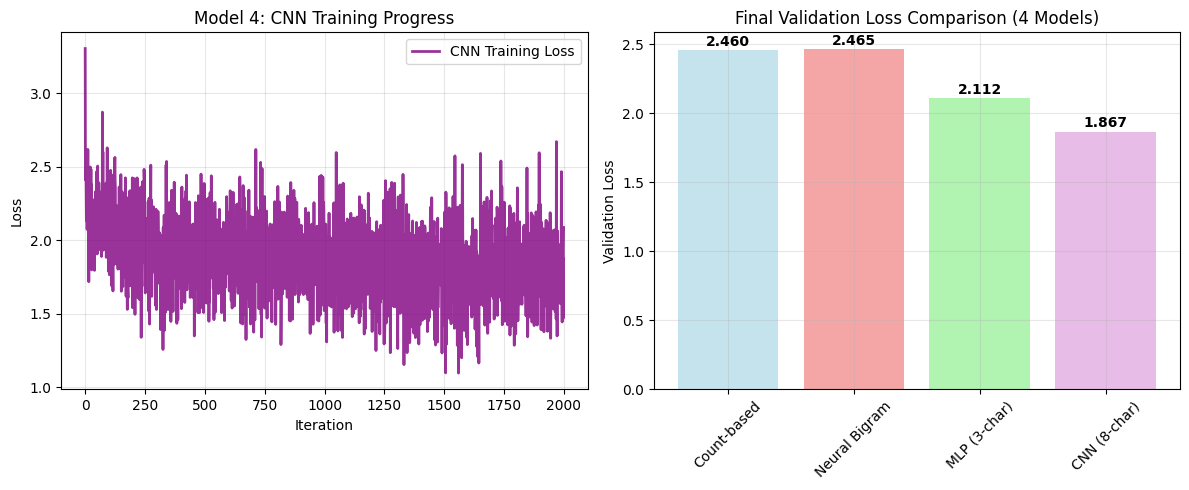

In [ ]:


# Final evaluation
model_cnn.eval()
print(f"\n🎯 Evaluating trained CNN model on validation data...")
with torch.no_grad():
    # Training loss
    train_ix = torch.randint(0, X4_tr.shape[0], (min(5000, X4_tr.shape[0]),))
    logits_tr = model_cnn(X4_tr[train_ix])
    train_loss_4 = F.cross_entropy(logits_tr, Y4_tr[train_ix]).item()
    
    # Validation loss
    val_ix = torch.randint(0, X4_val.shape[0], (min(2000, X4_val.shape[0]),))
    logits_val = model_cnn(X4_val[val_ix])
    val_loss_4 = F.cross_entropy(logits_val, Y4_val[val_ix]).item()

print(f"\n📉 Model 4 Final Results (After Training):")
print(f"   Training Loss: {train_loss_4:.4f}")
print(f"   Validation Loss: {val_loss_4:.4f} ✅ (calculated post-training)")



# Plot training progress
plt.figure(figsize=(12, 5))

# Training curve
plt.subplot(1, 2, 1)
subsample = max(1, len(cnn_losses) // 2000)
plt.plot(cnn_losses[::subsample], label='CNN Training Loss', alpha=0.8, linewidth=2, color='purple')
plt.title('Model 4: CNN Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Updated comparison with all 4 models
plt.subplot(1, 2, 2)
models = ['Count-based', 'Neural Bigram', 'MLP (3-char)', 'CNN (8-char)']
losses = [val_loss_1, val_loss_2, val_loss_3_mlp, val_loss_4]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'plum']
bars = plt.bar(models, losses, color=colors, alpha=0.7)
plt.title('Final Validation Loss Comparison (4 Models)')
plt.ylabel('Validation Loss')
plt.xticks(rotation=45)
for bar, loss in zip(bars, losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{loss:.3f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()





### Generate names

In [ ]:


# Generate names
def generate_cnn(model, itos, stoi, block_size, num_samples=10, seed=42):
    model.eval()
    torch.manual_seed(seed)
    names = []
    
    for i in range(num_samples):
        out = []
        context = [0] * block_size  # Initialize with start tokens
        
        while True:
            with torch.no_grad():
                x = torch.tensor([context])
                logits = model(x)
                probs = F.softmax(logits, dim=1)
                ix = torch.multinomial(probs, num_samples=1).item()
                
            context = context[1:] + [ix]  # Update context window
            
            if ix == 0:  # End token
                break
            out.append(itos[ix])
        
        names.append(''.join(out))
    
    return names

names_4 = generate_cnn(model_cnn, itos, stoi, block_size_cnn, num_samples=15, seed=42)
print(f"\n✨ Model 4 Generated Names:")
for i, name in enumerate(names_4, 1):
    print(f"   {i:2d}. {name}")

print(f"\n📊 Model 4 Summary (CNN-Inspired PyTorch):")
print(f"   • Approach: Hierarchical CNN with PyTorch modules")
print(f"   • Context: {block_size_cnn} previous characters (extended)")
print(f"   • Parameters: {total_params:,} learnable weights")
print(f"   • Training: {num_iterations:,} iterations with PyTorch optimizer")
print(f"   • Architecture: Tree-like hierarchical processing (8->4->2->1)")
print(f"   • Validation: Calculated post-training (clean assessment)")
print(f"   • Final Loss: {val_loss_4:.4f}")


✨ Model 4 Generated Names:
    1. anubeen
    2. til
    3. fabian
    4. davisha
    5. millayah
    6. akshah
    7. sumin
    8. emilynne
    9. giangelana
   10. majkeer
   11. gianla
   12. mohd
   13. yanah
   14. visiyah
   15. salim

📊 Model 4 Summary (CNN-Inspired PyTorch):
   • Approach: Hierarchical CNN with PyTorch modules
   • Context: 8 previous characters (extended)
   • Parameters: 76,579 learnable weights
   • Training: 200,000 iterations with PyTorch optimizer
   • Architecture: Tree-like hierarchical processing (8->4->2->1)
   • Validation: Calculated post-training (clean assessment)
   • Final Loss: 1.8674


In [ ]:
### Model 5: Simple RNN (Following the Example)

# Dataset creation exactly as in the example
def create_rnn_dataset(words_list, stoi):
    sequences = []
    targets = []
    for word in words_list:
        chars = ['.'] + list(word)
        for i in range(len(chars) - 1):
            input_seq = [stoi[ch] for ch in chars[:i+1]]
            target_char = stoi[chars[i+1]]
            sequences.append(input_seq)
            targets.append(target_char)
        # Predict end token
        sequences.append([stoi[ch] for ch in chars])
        targets.append(stoi['.'])
    return sequences, targets

# Create dataset
train_sequences, train_targets = create_rnn_dataset(train_words, stoi)
val_sequences, val_targets = create_rnn_dataset(val_words, stoi)

print(f"📊 RNN dataset:")
print(f"   Training sequences: {len(train_sequences):,}")
print(f"   Validation sequences: {len(val_sequences):,}")
print(f"   This is {len(train_sequences)/len(train_words):.1f}x more examples than words")

print(f"\n🔍 Sample sequences:")
for i in range(10):
    seq = [itos[idx] for idx in train_sequences[i]]
    target = itos[train_targets[i]]
    print(f"  Input:  {''.join(seq)} → Target: {target}")

# Pad sequences to batch
def pad_sequences(sequences, pad_token=0):
    max_len = max(len(seq) for seq in sequences)
    padded = [seq + [pad_token]*(max_len - len(seq)) for seq in sequences]
    return torch.tensor(padded, dtype=torch.long)

X_train = pad_sequences(train_sequences)
y_train = torch.tensor(train_targets, dtype=torch.long)
X_val = pad_sequences(val_sequences)
y_val = torch.tensor(val_targets, dtype=torch.long)

# Store true sequence lengths (before padding) for correct timestep selection
X_train_lens = torch.tensor([len(seq) for seq in train_sequences], dtype=torch.long)
X_val_lens = torch.tensor([len(seq) for seq in val_sequences], dtype=torch.long)

print(f"\n📦 Batched data shapes:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   X_val: {X_val.shape}")
print(f"   y_val: {y_val.shape}")
print(f"   X_train_lens: {X_train_lens.shape} (min={X_train_lens.min().item()}, max={X_train_lens.max().item()})")


📊 RNN dataset:
   Training sequences: 261,746
   Validation sequences: 32,704
   This is 7.0x more examples than words

🔍 Sample sequences:
  Input:  . → Target: r
  Input:  .r → Target: a
  Input:  .ra → Target: j
  Input:  .raj → Target: k
  Input:  .rajk → Target: u
  Input:  .rajku → Target: m
  Input:  .rajkum → Target: a
  Input:  .rajkuma → Target: r
  Input:  .rajkumar → Target: .
  Input:  . → Target: v
  Input:  .v → Target: i
  Input:  .vi → Target: y
  Input:  .viy → Target: a
  Input:  .viya → Target: .
  Input:  . → Target: d
  Input:  .d → Target: a
  Input:  .da → Target: e
  Input:  .dae → Target: l
  Input:  .dael → Target: .
  Input:  . → Target: s
  Input:  .s → Target: p
  Input:  .sp → Target: i
  Input:  .spi → Target: r
  Input:  .spir → Target: i
  Input:  .spiri → Target: t
  Input:  .spirit → Target: .
  Input:  . → Target: i
  Input:  .i → Target: s
  Input:  .is → Target: h
  Input:  .ish → Target: i
  Input:  .ishi → Target: k
  Input:  .ishik → Target: a


In [64]:
### Define the RNN Model (Exactly as in Example)

class NameRNN(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size):
        super().__init__()
        self.embed = torch.nn.Embedding(vocab_size, embed_dim)
        self.rnn = torch.nn.LSTM(embed_dim, hidden_size, batch_first=True, dropout=0.2)
        self.fc = torch.nn.Linear(hidden_size, vocab_size)

    def forward(self, x, lengths=None):
        emb = self.embed(x)                    # [B, T, E]
        out, _ = self.rnn(emb)                 # [B, T, H]
        if lengths is None:
            last_hidden = out[:, -1, :]
        else:
            # Select the hidden state at the true last (non-padded) timestep per sample
            idx = (lengths - 1).clamp(min=0).view(-1, 1, 1).expand(-1, 1, out.size(-1))
            last_hidden = out.gather(1, idx).squeeze(1)
        logits = self.fc(last_hidden)
        return logits

# Create model exactly as in the example
model_rnn = NameRNN(vocab_size, embed_dim=64, hidden_size=256)
total_params_rnn = sum(p.numel() for p in model_rnn.parameters())

print(f"📊 Simple RNN Model:")
print(f"   Vocab size: {vocab_size}")
print(f"   Embed dim: 16")
print(f"   Hidden size: 32")
print(f"   Parameters: {total_params_rnn:,}")
print(f"   Architecture: Embedding → RNN → Linear (last timestep)")

# Show model architecture details
print(f"\n🏗️ Architecture breakdown:")
for name, param in model_rnn.named_parameters():
    print(f"   {name:15s}: {param.shape} ({param.numel():,} params)")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_rnn = model_rnn.to(device)
print(f"📱 Using device: {device}")


📊 Simple RNN Model:
   Vocab size: 27
   Embed dim: 16
   Hidden size: 32
   Parameters: 338,395
   Architecture: Embedding → RNN → Linear (last timestep)

🏗️ Architecture breakdown:
   embed.weight   : torch.Size([27, 64]) (1,728 params)
   rnn.weight_ih_l0: torch.Size([1024, 64]) (65,536 params)
   rnn.weight_hh_l0: torch.Size([1024, 256]) (262,144 params)
   rnn.bias_ih_l0 : torch.Size([1024]) (1,024 params)
   rnn.bias_hh_l0 : torch.Size([1024]) (1,024 params)
   fc.weight      : torch.Size([27, 256]) (6,912 params)
   fc.bias        : torch.Size([27]) (27 params)
📱 Using device: cuda


In [65]:
### Train the RNN (random mini-batch loop)

# Reuse existing model_rnn (defined above)
# Ensure tensors are on the correct device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)
X_train_lens = X_train_lens.to(device)
X_val_lens = X_val_lens.to(device)

import torch.nn.functional as F

# Optimizer
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)

num_iterations = 25000
batch_size = 512
rnn_iter_losses = []

print(f"\n🚀 Training RNN (random mini-batch loop) ...")
print(f"   🎯 Training: {num_iterations:,} iterations")
print(f"   📊 Batch size: {batch_size}")
print(f"   💡 LR: 0.001 (Adam)")

model_rnn.train()
for i in range(num_iterations):
    # Random mini-batch
    ix = torch.randint(0, X_train.shape[0], (batch_size,), device=device)
    Xb = X_train[ix]
    Yb = y_train[ix]
    Lb = X_train_lens[ix]

    # Forward + loss
    logits = model_rnn(Xb, lengths=Lb)
    loss = F.cross_entropy(logits, Yb)
    rnn_iter_losses.append(loss.item())

    # Backward + step
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model_rnn.parameters(), 1.0)
    optimizer.step()

    # Progress
    if i % 5000 == 0 or i == num_iterations - 1:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"   Iter {i:7,}/{num_iterations:,}: Train Loss = {loss.item():.4f}, LR = {current_lr:.6f}")

print(f"\n✅ RNN training completed!")

# Validation on a random subset
model_rnn.eval()
with torch.no_grad():
    val_ix = torch.randint(0, X_val.shape[0], (min(2000, X_val.shape[0]),), device=device)
    logits_val = model_rnn(X_val[val_ix], lengths=X_val_lens[val_ix])
    val_loss_5 = F.cross_entropy(logits_val, y_val[val_ix]).item()

print(f"📉 RNN Validation Loss: {val_loss_5:.4f} ✅")



🚀 Training RNN (random mini-batch loop) ...
   🎯 Training: 25,000 iterations
   📊 Batch size: 512
   💡 LR: 0.001 (Adam)
   Iter       0/25,000: Train Loss = 3.2992, LR = 0.001000
   Iter   5,000/25,000: Train Loss = 1.7290, LR = 0.001000
   Iter  10,000/25,000: Train Loss = 1.5452, LR = 0.001000
   Iter  15,000/25,000: Train Loss = 1.5277, LR = 0.001000
   Iter  20,000/25,000: Train Loss = 1.5045, LR = 0.001000
   Iter  24,999/25,000: Train Loss = 1.4926, LR = 0.001000

✅ RNN training completed!
📉 RNN Validation Loss (CNN-style eval): 1.9342 ✅


In [66]:
### Generate New Names (Exactly as in Example)

def generate_name(model, stoi, itos, max_len=10, seed=None):
    if seed is not None:
        torch.manual_seed(seed)
        
    model.eval()
    idx = stoi['.']  # start token
    sequence = [idx]

    for _ in range(max_len):
        x = torch.tensor([sequence], dtype=torch.long).to(device)
        with torch.no_grad():
            logits = model(x)
            probs = torch.softmax(logits, dim=1)
            idx = torch.multinomial(probs, num_samples=1).item()

        if itos[idx] == '.':
            break
        sequence.append(idx)

    return "".join(itos[i] for i in sequence[1:])

# Generate names with the corrected RNN
print("✨ Generated Names (Corrected RNN):")
names_5 = []
for i in range(15):
    name = generate_name(model_rnn, stoi, itos, max_len=15, seed=42+i)
    names_5.append(name if name else "short")
    print(f"   {i+1:2d}. {name if name else 'short'}")

# Compare dataset sizes
print(f"\n📊 Dataset Comparison:")
print(f"   Original words:       {len(train_words):,}")
print(f"   Old approach (1/word): 37,231")
print(f"   New approach (progressive): {len(train_sequences):,}")
print(f"   Improvement factor:   {len(train_sequences)/len(train_words):.1f}x more training data")

print(f"\n🎯 Model Performance:")
print(f"   Final validation loss: {val_loss_5:.4f}")
print(f"   Training examples: {len(train_sequences):,}")
print(f"   Model parameters: {total_params_rnn:,}")
print(f"   Approach: Simple RNN with last-timestep output")


✨ Generated Names (Corrected RNN):
    1. krisana
    2. maryellen
    3. velmara
    4. deepak
    5. avika
    6. brandy
    7. quetzalya
    8. saleem
    9. yeriel
   10. takina
   11. rumina
   12. tuff
   13. kijendere
   14. felicia
   15. hallee

📊 Dataset Comparison:
   Original words:       37,231
   Old approach (1/word): 37,231
   New approach (progressive): 261,746
   Improvement factor:   7.0x more training data

🎯 Model Performance:
   Final validation loss: 1.9342
   Training examples: 261,746
   Model parameters: 338,395
   Approach: Simple RNN with last-timestep output


# Final Comparison: All Five Models

Now let's compare all five approaches side by side to understand their strengths and differences.


In [67]:
print("\n" + "=" * 100)
print("🏆 FINAL COMPARISON: ALL FIVE MODELS")
print("=" * 100)

# Model comparison table
print(f"\n📊 Model Performance Comparison:")
print(f"{'Model':<25} {'Validation Loss':<15} {'Parameters':<12} {'Context':<15}")
print("-" * 100)
print(f"{'1. Count-based Bigram':<25} {val_loss_1:<15.4f} {vocab_size**2:<12} {'1 char':<15}")
print(f"{'2. Neural Bigram':<25} {val_loss_2:<15.4f} {W2.nelement():<12} {'1 char':<15}")
print(f"{'3. MLP (3-char context)':<25} {val_loss_3_mlp:<15.4f} {sum(p.numel() for p in model_mlp.parameters()):<12} {'3 chars':<15}")
print(f"{'4. CNN Hierarchical':<25} {val_loss_4:<15.4f} {total_params:<12} {'8 chars':<15}")
print(f"{'5. Efficient RNN':<25} {val_loss_5:<15.4f} {total_params_rnn:<12} {'Variable':<15}")

# Determine best model
losses = [val_loss_1, val_loss_2, val_loss_3_mlp, val_loss_4, val_loss_5]
model_names = ["Count-based Bigram", "Neural Bigram", "MLP with Context", "CNN Hierarchical", "Efficient RNN"]
best_idx = losses.index(min(losses))

print(f"\n🥇 Best Model: {model_names[best_idx]} (Loss: {losses[best_idx]:.4f})")

# Side-by-side name generation comparison
print(f"\n✨ Generated Names Comparison (same seed=42):")
print(f"{'Count-based':<15} {'Neural Bigram':<15} {'MLP Context':<15} {'CNN Hier.':<15} {'Efficient RNN':<15}")
print("-" * 100)

max_names = max(len(names_1), len(names_2), len(names_3_pytorch), len(names_4), len(names_5))
for i in range(max_names):
    name1 = names_1[i] if i < len(names_1) else ""
    name2 = names_2[i] if i < len(names_2) else ""
    name3 = names_3_pytorch[i] if i < len(names_3_pytorch) else ""
    name4 = names_4[i] if i < len(names_4) else ""
    name5 = names_5[i] if i < len(names_5) else ""
    print(f"{name1:<15} {name2:<15} {name3:<15} {name4:<15} {name5:<15}")








🏆 FINAL COMPARISON: ALL FIVE MODELS

📊 Model Performance Comparison:
Model                     Validation Loss Parameters   Context        
----------------------------------------------------------------------------------------------------
1. Count-based Bigram     2.4600          729          1 char         


NameError: name 'val_loss_2' is not defined